# Iris classification example

Example usage of tengp package for classification, using Iris dataset.

We are going to load the data using [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) package.

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

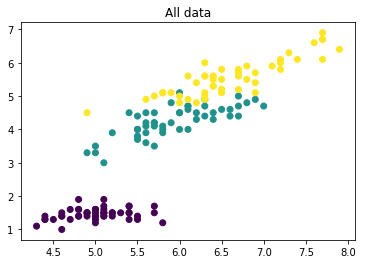

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,2], c=y);
plt.title('All data');

Create training and testing subset of data. In this example, we are not going to tune any hyperparameters, therefore we will not use any validation subset.

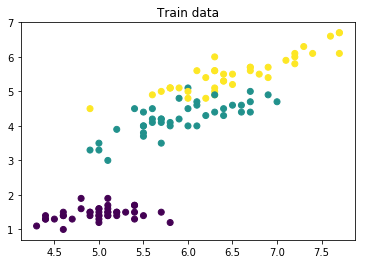

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
plt.title('Train data');

Now let's import tengp package and setup our function set.

In [5]:
import tengp
import numpy as np
from sklearn.metrics import accuracy_score

def protected_division(x, y):
    return np.divide(x, y, out=np.copy(x), where=y!=0)

def protected_log(x):
    return np.log(x, out=np.copy(x), where=x>0)

funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(protected_division, 2)
funset.add(protected_log, 1)

Our fitness will be accuracy score. Since output of the CGP program is real-valued, we need to create class labels from it somehow. For each quadruple of inputs, CGP program outputs 3 values. In this case, we just pick the index of the largest value, as our class label (since we are not interested in probability of belonging into some class - in that case activation function, such as softmax could be used).

Note, that tengp tries to minimize the value of the cost function, hence we are returning the negative value of accuracy score - the lower, the better.

In [6]:
def cost_function(y, y_pred):
    labels = np.array(y_pred).argmax(axis=1)
    return -accuracy_score(y, labels)

Bundle function set with other parameters into Parameters object.

First two arguments of Parameters denotes number of input nodes and number of output nodes.

In [7]:
%%time

params = tengp.Parameters(4, 3, n_columns=100, n_rows=1, function_set=funset)


res = tengp.simple_es(X_train, y_train, cost_function, params, target_fitness=-1, random_state=42, mutation='single', verbose=100)

Gen: 100, population: [-0.675, -0.675, -0.6666666666666666, -0.3333333333333333, -0.3333333333333333]
Gen: 200, population: [-0.9583333333333334, -0.675, -0.675, -0.6666666666666666, -0.625]
Gen: 300, population: [-0.9833333333333333, -0.95, -0.7416666666666667, -0.65, -0.35]
Gen: 400, population: [-0.9833333333333333, -0.95, -0.8, -0.4583333333333333, -0.45]
Gen: 500, population: [-0.9833333333333333, -0.9833333333333333, -0.9833333333333333, -0.7333333333333333, -0.7]
Gen: 600, population: [-0.9833333333333333, -0.9833333333333333, -0.975, -0.7, -0.38333333333333336]
Gen: 700, population: [-0.9833333333333333, -0.9416666666666667, -0.925, -0.875, -0.475]
Gen: 800, population: [-0.9833333333333333, -0.975, -0.9666666666666667, -0.7416666666666667, -0.35]
Gen: 900, population: [-0.9833333333333333, -0.9833333333333333, -0.925, -0.6583333333333333, -0.65]
CPU times: user 5.19 s, sys: 46.9 ms, total: 5.23 s
Wall time: 5.25 s


Result is the sorted list containing out final population of programs. Let's evaluate the best individual on test dataset.

Program, f:-0.9833333333333333


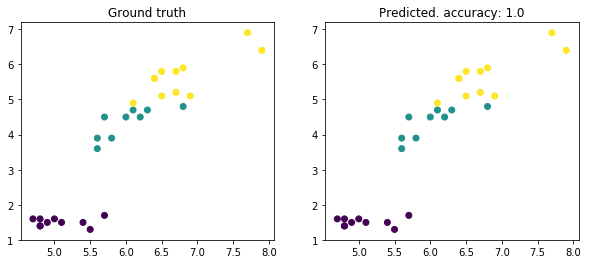

In [8]:
print(res[0])

y_pred = res[0].transform(X_test)
labels = np.array(y_pred).argmax(axis=1)
score = accuracy_score(y_test, labels)

_, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].scatter(X_test[:, 0], X_test[:, 2], c=y_test)
axs[0].set_title('Ground truth')

axs[1].scatter(X_test[:, 0], X_test[:, 2], c=labels)
axs[1].set_title('Predicted. accuracy: {:.2}'.format(score));

Print expression encoded in each output.

In [9]:
expressions = res[0].get_expression()
for expr in expressions:
    print(f'{expr}\n')

protected_division(protected_log(add(add(x2,protected_division(x3,x3)),protected_log(x3))),protected_division(add(protected_division(protected_log(multiply(protected_division(x1,add(x2,x3)),protected_division(x3,add(x2,x2)))),subtract(protected_log(x3),subtract(protected_division(multiply(protected_log(x3),x2),protected_division(protected_division(x1,add(x2,x3)),protected_log(x3))),x1))),subtract(protected_division(multiply(protected_log(x3),x2),protected_division(protected_division(x1,add(x2,x3)),protected_log(x3))),x1)),multiply(x3,add(x2,x2))))

multiply(protected_log(multiply(x0,x3)),subtract(protected_division(protected_division(x1,add(x2,x3)),protected_log(x3)),multiply(protected_log(x3),x2)))

add(protected_division(subtract(protected_log(protected_division(multiply(protected_log(x3),x2),protected_division(protected_division(x1,add(x2,x3)),protected_log(x3)))),x2),protected_log(x3)),multiply(protected_log(protected_log(x3)),protected_log(multiply(protected_division(x1,add(x2,x3)